# 0.Import libraries

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

# 2. Data preprocessing

In [393]:
df = pd.read_csv("../data/imdb.csv")
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


In [394]:
df.shape

(6178, 14)

Dữ liệu có 6178 dòng và 14 cột

**Giải thích ý nghĩa từng cột:**
- `Name`: Tên phim
- `Date`: Ngày phát hành
- `Rate`: Điểm imdb trung bình của phim
- `Votes`: Số lượng người đánh giá phim
- `Genre`: Thể loại phim
- `Duration`: Độ dài phim
- `Type`: Loại phim, gồm `Film` - Phim lẻ và `Series` - Phim bộ
- `Certificate`: Nhãn phim
- `Episodes`: Số lượng tập (chỉ đối với các dòng có `Type` là `Series`)
- `Nudity`: Mức độ các cảnh 'nóng' trong phim
- `Violence`: Mức độ các cảnh bạo lực trong phim
- `Profanity`: Mức độ cảc cảnh chửi rủa trong phim
- `Alcohol`: Mức độ các cảnh xuất hiện cồn trong phim
- `Frightening`: mức độ các cảnh gây sợ hãi trong phim

Các cột `Nudity, Violence, Profanity, Alcohol, Frightening` có chung bộ giá trị đánh giá mức độ gồm:
- `None`: Hầu như không có
- `Mild`: Nhẹ
- `Moderate`: Vừa phải
- `Severe`: Nặng
- `No Rate`: Không có đánh giá của người xem ở khía cạnh này

Trước khi tiến hành tiền xử lí dữ liệu, như đã đề cập trước ở phần `1. Data Collecting`, nhóm chỉ tiến hành xử lí và phân tích dữ liệu của các phim lẻ (`Film`), không phân tích dữ liệu các phim bộ (`Series`), do đó nhóm sẽ loại bỏ các dòng có giá trị `Series` của cột `Type`

In [395]:
df = df[df["Type"] == "Film"]

In [396]:
df["Episodes"].value_counts()

-    4446
Name: Episodes, dtype: int64

Sau khi chỉ giữ lại các `Film` thì ở cột `Episodes` chỉ số lượng tập của phim lúc này chỉ chứa giá trị '`-`'. Đồng thời lúc này cột `Type` cũng chỉ còn chứa giá trị `Film`, do đó nhóm sẽ xóa cột `Type` và `Episodes`

In [397]:
df.drop(["Episodes", "Type"], axis=1, inplace=True)

In [398]:
df.shape

(4446, 12)

Sau khi xóa các dòng `Series` và cột `Episodes`, dữ liệu còn lại 4446 dòng, 13 cột

## 2.1. Missing value


In [399]:
df.isna().sum()

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Certificate    0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

Kiểm tra sơ bằng hàm `isna()`, không có ô dữ liệu nào bị thiếu (không có giá trị). Tuy nhiên khi quan sát dữ liệu, nhóm nhận thấy ở một số cột có các giá trị tượng trưng cho không có dữ liệu như `"None"`, `"No Rate"`

### 2.1.1. Cột `Rate` và cột `Votes`



In [400]:
df["Rate"].value_counts().sort_index().index

Index(['1.2', '1.9', '2.0', '2.3', '2.4', '2.5', '2.7', '2.8', '2.9', '3.0',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.7', '3.8', '3.9', '4.0', '4.1',
       '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5.0', '5.1',
       '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6.0', '6.1',
       '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8.0', '8.1',
       '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9.0', '9.2',
       '9.3', 'No Rate'],
      dtype='object')

In [401]:
df["Votes"].value_counts().sort_index().index

Index(['1,000', '1,015', '1,023', '1,031,650', '1,036,534', '1,044',
       '1,045,683', '1,047,410', '1,049,398', '1,054',
       ...
       '99,495', '99,578', '99,655', '99,665', '99,670', '99,760', '990,836',
       '993,069', '995', 'No Votes'],
      dtype='object', length=3439)

In [402]:
df[df["Rate"] == "No Rate"].equals(df[df["Votes"] == "No Votes"])

True

In [403]:
df[df["Rate"] == "No Rate"]["Rate"].count()

145

Kiểm tra hai cột `Rate` và `Votes`, nhóm nhận thấy cột `Rate` có giá trị `No Rate` tượng trưng cho giá trị rỗng, cột `Votes` có giá trị `No Votes` tượng trưng cho giá trị rỗng. Đồng thời các dòng có giá trị `No Rate` cũng chính là các dòng có giá trị `No Votes`. Do chỉ có 145 dòng này, nhóm quyết định xóa các dòng này khỏi dataframe

In [404]:
df = df[df["Rate"] != "No Rate"]

### 2.1.2. Cột Duration

In [405]:
df["Duration"].value_counts().sort_index().index

Index(['100 ', '101 ', '102 ', '103 ', '104 ', '105 ', '106 ', '107 ', '108 ',
       '109 ',
       ...
       '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', 'None'],
      dtype='object', length=150)

In [406]:
df[df["Duration"] == "None"]

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
241,Hotel Transylvania: Transformania,2022,6.9,316,"Animation, Adventure, Comedy",None,PG,None,Severe,Severe,Severe,Severe
1915,Unaired Game of Thrones Prequel Pilot,2019,6.6,90,Fantasy,None,None,No Rate,No Rate,No Rate,No Rate,No Rate
5008,My Struggle,2021,8.7,74,Biography,None,None,No Rate,No Rate,No Rate,No Rate,No Rate
6158,My Struggle,2021,8.7,74,Biography,None,None,No Rate,No Rate,No Rate,No Rate,No Rate


Cột `Duration` chỉ có 4 giá trị `None`. Nhóm quyết định xóa các dòng này

In [407]:
df = df[df["Duration"] != "None"]

### 2.1.3. Cột Certificate

In [408]:
df["Certificate"].value_counts()

R            1873
PG-13        1132
PG            523
Not Rated     189
None          179
TV-MA         109
G              70
Approved       42
Unrated        40
TV-14          35
Passed         24
NC-17          14
TV-PG          13
E              12
(Banned)       10
TV-G           10
GP              6
X               6
TV-Y7           5
M               3
M/PG            2
Name: Certificate, dtype: int64

In [409]:
df[df["Certificate"] == "Not Rated"]

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
237,Busanhaeng,2016,7.6,"190,528","Action, Horror, Thriller",118,Not Rated,None,Severe,Mild,None,Severe
266,Batoru rowaiaru,2000,7.6,"176,302","Action, Adventure, Drama",114,Not Rated,Mild,Severe,Mild,Mild,Severe
310,Black as Night,2021,3.9,"1,087","Drama, Horror, Thriller",87,Not Rated,None,Mild,Moderate,Moderate,Moderate
340,Rakka,2017,7.4,"7,037","Short, Horror, Sci-Fi",22,Not Rated,No Rate,Severe,Moderate,Mild,No Rate
351,The Manor,2021,5.3,"1,677",Horror,81,Not Rated,None,None,Mild,None,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...
6109,Anatomy of a Murder,1959,8.0,"63,564","Drama, Mystery",161,Not Rated,None,Mild,Mild,Mild,Mild
6149,Brawl in Cell Block 99,2017,7.2,"62,894","Action, Crime, Drama",132,Not Rated,Mild,Severe,Moderate,Mild,Severe
6154,Dalkomhan insaeng,2005,7.5,"38,677","Action, Crime, Drama",119,Not Rated,None,Severe,Severe,Mild,Moderate
6171,Chugyeokja,2008,7.8,"62,423","Action, Crime, Thriller",125,Not Rated,Mild,Severe,Moderate,Mild,Severe


Quan sát các dòng chứa giá trị `"Not Rated"` ở cột `"Certificate"`, nhóm nhận thấy ở các cột khác tương đối đủ giá trị, do đó nhóm quyết định giữ lại các dòng này, ý nghĩa của giá trị `"Not Rated"` sẽ được quyết định sau 

In [410]:
df[df["Certificate"] == "None"][["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]].value_counts()

Nudity   Violence  Profanity  Alcohol  Frightening
No Rate  No Rate   No Rate    No Rate  No Rate        179
dtype: int64

Quan sát các dòng chứa giá trị `"None"` ở cột `"Certificate"`, nhóm nhận thấy các cột đánh giá như `"Nudity"`, `"Violence"` đều mang giá trị `"No Rate"`. Do đó các dòng này có thể xem như dữ liệu khuyết của cột `"Certificate"`, nhóm quyết định xóa bỏ các dòng này

In [411]:
df = df[df["Certificate"] != "None"]

### 2.1.4. Các cột đánh giá `"Nudity"`, `"Violence"`, `"Profanity"`, `"Alcohol"`, `"Frightening"`

In [412]:
df[(df["Nudity"] == "No Rate") 
   | (df["Violence"] == "No Rate") 
   | (df["Profanity"] == "No Rate") 
   | (df["Alcohol"] == "No Rate") 
   | (df["Frightening"] == "No Rate")
][
    ["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]
]

,Nudity,Violence,Profanity,Alcohol,Frightening
57,None,Severe,Severe,No Rate,Severe
194,No Rate,Moderate,Moderate,Mild,Moderate
223,No Rate,No Rate,No Rate,No Rate,No Rate
235,No Rate,No Rate,No Rate,No Rate,No Rate
340,No Rate,Severe,Moderate,Mild,No Rate
...,...,...,...,...,...
5785,No Rate,No Rate,No Rate,No Rate,No Rate
5798,Mild,Moderate,Mild,No Rate,Moderate
5959,No Rate,No Rate,No Rate,No Rate,No Rate
6078,No Rate,No Rate,No Rate,No Rate,No Rate


Các giá trị `"No Rate"` của các cột đánh giá thường xuất hiện cùng nhau. Sau khi thống nhất, nhóm quyết định xoá tất cả các dòng có giá trị `No Rate` ở 1 trong 5 cột này

In [413]:
df = df[~((df["Nudity"] == "No Rate") 
   | (df["Violence"] == "No Rate") 
   | (df["Profanity"] == "No Rate") 
   | (df["Alcohol"] == "No Rate") 
   | (df["Frightening"] == "No Rate"))
]

## 2.2. Duplicated value

In [414]:
df[df.duplicated(keep = False)].sort_values("Name")

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
5755,10,1979,6.1,"17,216","Comedy, Romance",122,R,Severe,None,Mild,Moderate,None
4605,10,1979,6.1,"17,216","Comedy, Romance",122,R,Severe,None,Mild,Moderate,None
4505,10 Years,2011,6.1,"25,016","Comedy, Drama, Romance",110,PG-13,Mild,None,Mild,Mild,None
5655,10 Years,2011,6.1,"25,016","Comedy, Drama, Romance",110,PG-13,Mild,None,Mild,Mild,None
4133,12 Strong,2018,6.6,"74,061","Action, Drama, History",130,R,None,Severe,Moderate,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
4359,À bout de souffle,1960,7.8,"77,529","Crime, Drama",90,Not Rated,Mild,Mild,Moderate,Moderate,None
4799,À l'intérieur,2007,6.7,"39,232",Horror,82,R,None,Severe,Moderate,Mild,Severe
5949,À l'intérieur,2007,6.7,"39,232",Horror,82,R,None,Severe,Moderate,Mild,Severe
5955,Átame!,1989,7.0,"27,688","Comedy, Crime, Drama",101,NC-17,Moderate,Moderate,Moderate,Moderate,Mild


In [415]:
df.duplicated().sum()

775

Dữ liệu có 782 dòng bị trùng lắp, nhóm quyết định xóa các dòng này

In [416]:
df = df.drop_duplicates()

## 2.3. Điều chỉnh kiểu dữ liệu của các cột

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 0 to 5027
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         3225 non-null   object
 1   Date         3225 non-null   int64 
 2   Rate         3225 non-null   object
 3   Votes        3225 non-null   object
 4   Genre        3225 non-null   object
 5   Duration     3225 non-null   object
 6   Certificate  3225 non-null   object
 7   Nudity       3225 non-null   object
 8   Violence     3225 non-null   object
 9   Profanity    3225 non-null   object
 10  Alcohol      3225 non-null   object
 11  Frightening  3225 non-null   object
dtypes: int64(1), object(11)
memory usage: 327.5+ KB


Nhóm nhận thấy một số cột có kiểu dữ liệu chưa phù hợp:
- `Rate`: object -> cần chuyển thành float
- `Votes`: object -> cần chuyển thành int64
- `Duration`: object -> cần chuyển thành int64

Ngoài ra còn cột `Date` biểu diễn năm phát hành của phim, hiện đang có kiểu dữ liệu int64. Do cột này chỉ chứa giá trị năm nên có thể để ở kiểu int64

In [418]:
df["Rate"] = df["Rate"].astype("float")

In [419]:
df["Votes"] = df["Votes"].str.replace(",","").astype("int64")

In [420]:
df["Duration"] = df["Duration"].astype("int")

## 2.4. Outlier

### 2.4.1. Các cột numerical

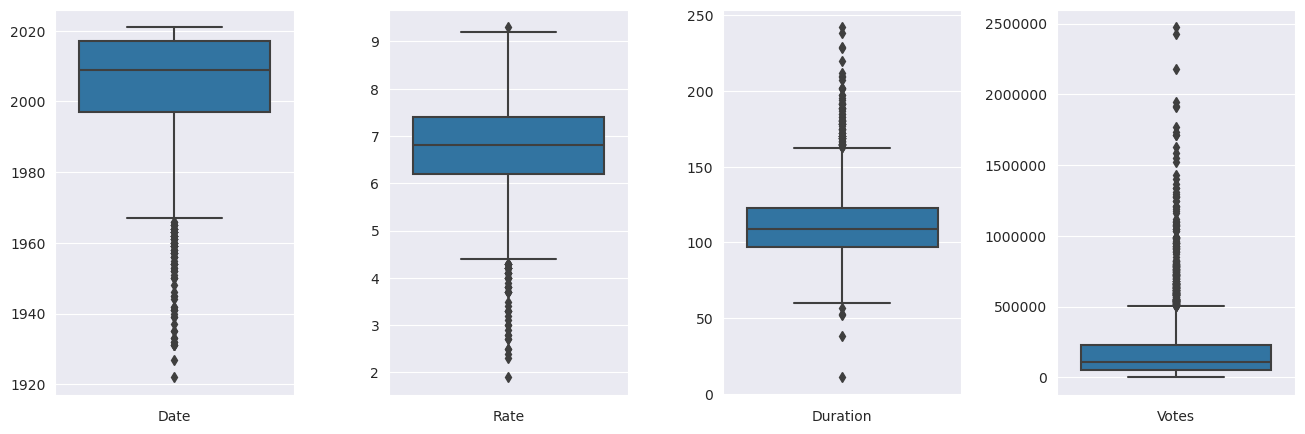

In [421]:
fig, axes = plt.subplots(ncols = 4, figsize = (16, 5))
fig.subplots_adjust(wspace = 0.4)



for ax, feature in zip(axes, ["Date", "Rate", "Duration", "Votes"]):
    sns.boxplot(df[feature], ax = ax)
    ax.set_xlabel(feature)
    ax.set_xticklabels([])

plt.ticklabel_format(style='plain', axis='y')

- Đối với cột `Date`, các giá trị ngoại lai chủ yếu rơi vào nhóm các phim cũ ra mắt khoảng trước năm 1970. Do các phim này ra mắt đã lâu, nhóm quyết định xóa bỏ các dòng này.
- Đối với cột `Rate`, các giá trị ngoại lai chủ yếu rơi vào nhóm các phim có rate thấp từ 2 tới 4 điểm. Tuy nhiên các giá trị ngoại lai này phân bố liên tục, nên nhóm sẽ giữ lại các giá trị này. Cùng lí do các giá trị ngoại lai phân bố liên tục, nhóm cũng sẽ giữ nguyên cột `Duration`.
- Đối với cột `Votes`, các giá trị ngoại lai chủ yếu rơi vào nhóm các phim có lượng vote cao. Tuy các giá trị này nằm rất xa so với phần lớn dữ liệu, nhưng các phim được càng nhiều vote thì càng được nhiều người quan tâm, do đó nhóm cũng sẽ giữ lại các giá trị này.

In [422]:
dateq = np.quantile(df["Date"], q = [0.25, 0.5, 0.75])
date_threshold = dateq[0] - 1.5 * (dateq[2] - dateq[0])
df = df[df["Date"] >= date_threshold]

### 2.4.2. Các cột categorical

In [423]:
df["Genre"].value_counts()

Action, Adventure, Sci-Fi       113
Drama, Romance                  103
Animation, Adventure, Comedy     99
Drama                            92
Comedy, Drama, Romance           91
                               ... 
Action                            1
Biography, Drama, Musical         1
Animation, Drama, War             1
Action, Horror, War               1
Drama, Family, History            1
Name: Genre, Length: 285, dtype: int64

Cột `Genre` không chứa các giá trị đơn mà mỗi dòng có thể chứa hơn 1 giá trị về thể loại của phim (vì một phim có thể thuộc đồng thời nhiều thể loại). Do đó cột này có tới 290 nhãn khác biệt, nhóm sẽ không can thiệp vào cột này

Text(0, 0.5, 'Count')

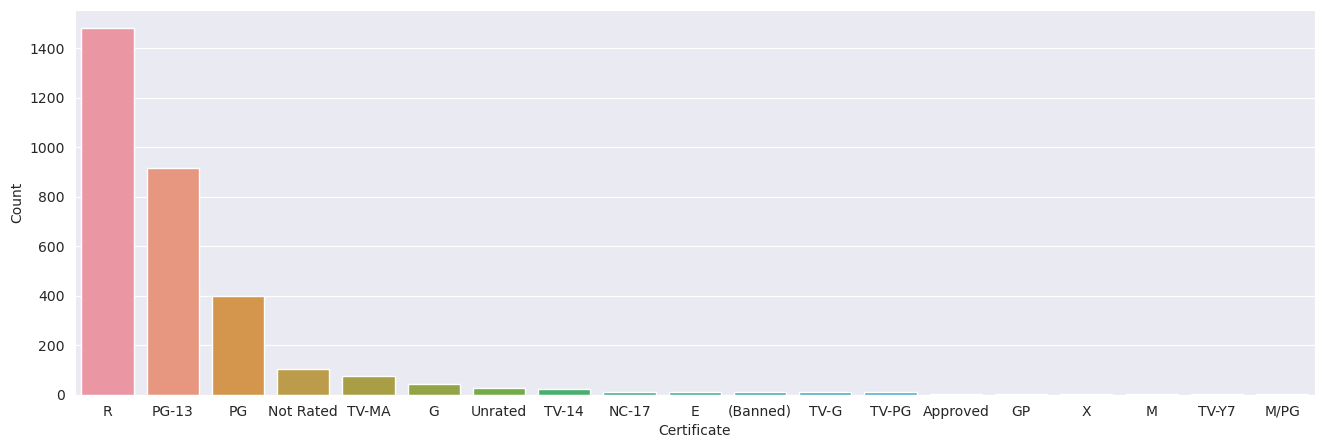

In [424]:
plt.figure(figsize = (16, 5))
ax = sns.barplot(df["Certificate"].value_counts().reset_index(), x = "index", y = "Certificate")
ax.set_xlabel("Certificate")
ax.set_ylabel("Count")

Cột `Certificate` có khá nhiều giá trị ngoại lai, tuy nhiên ý nghĩa của các giá trị trong cột này sẽ được xử lí ở phần sau, tạm thời nhóm chưa can thiệp vào cột này

(0.0, 1.0, 0.0, 1.0)

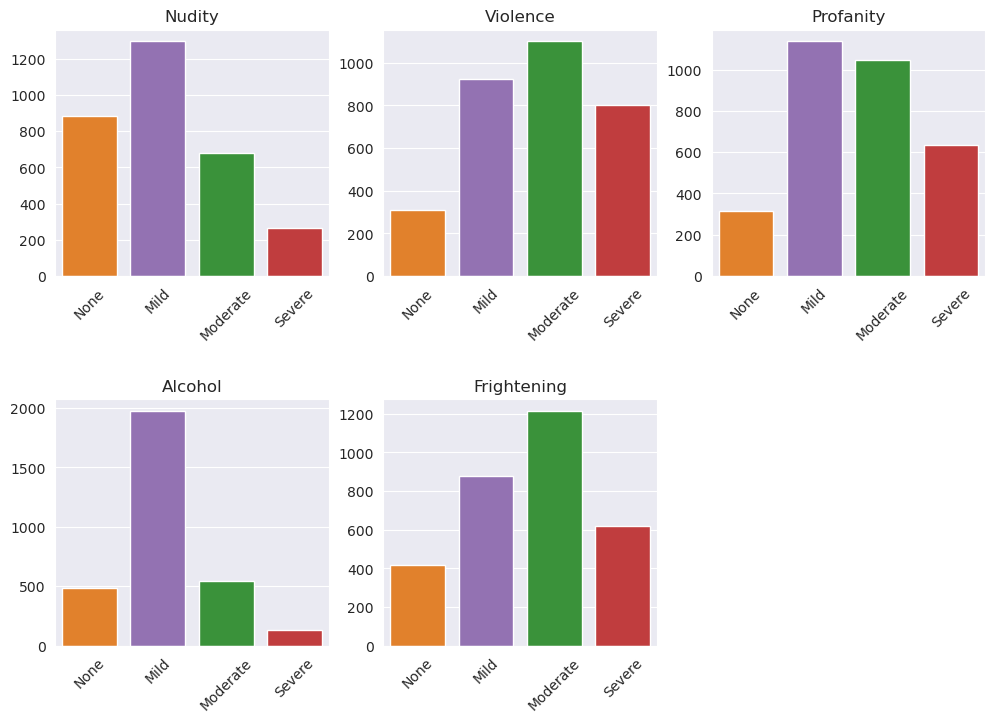

In [425]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))
fig.subplots_adjust(hspace = 0.5)

palette = {
    "No Rate" : "C0",
    "None": "C1",
    "Moderate": "C2",
    "Severe": "C3",
    "Mild": "C4"
}

stat = ["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]
level = ["None", "Mild", "Moderate", "Severe"]

for ax, feature in zip(axes.flatten(), stat):
    sns.barplot(df[feature].value_counts().loc[level].reset_index(), x = "index", y = feature, ax = ax, palette = palette)
    ax.set_title(feature)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

axes[-1, -1].axis("off")

Các cột đánh giá các yếu tố `Nudity`, `Violence`, `Profanity`, `Alcohol`, `Frightening` không có giá trị ngoại lai

## 2.5. Khảo sát sâu hơn cột `Certificate`

In [426]:
df["Certificate"].value_counts()

R            1481
PG-13         914
PG            398
Not Rated     105
TV-MA          76
G              43
Unrated        26
TV-14          22
NC-17          12
E              10
(Banned)       10
TV-G            9
TV-PG           9
Approved        4
GP              3
X               3
M               2
TV-Y7           1
M/PG            1
Name: Certificate, dtype: int64

Giải thích các giá trị của cột "Certificate"
- `"R"`: Thanh thiếu niên dưới 18 tuổi không được xem phim nếu không có sự đồng ý của người lớn.
- `"PG-13"`: Phim có một số chi tiết không phù hợp với trẻ từ 13 tuổi trở xuống
- `"PG"`: Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim.
- `"Not Rated"`:  Chưa được kiểm duyệt, thường bởi vì có những cảnh nóng/bạo lực ở mức cao
- `"TV-MA"`: Không phù hợp với thanh thiếu niên dưới 18 tuổi
- `"G"`: Phù hợp với mọi lứa tuổi 
- `"Unrated"`: Chưa được kiểm duyệt, thường bởi vì có những cảnh nóng/bạo lực ở mức cao
- `"TV-14"`: Phim có một số chi tiết không phù hợp với trẻ dưới 14 tuổi.
- `"NC-17"`: Không phù hợp với thanh thiếu niên dưới 18 tuổi
- `"E"`: Không rõ
- `"(Banned)"`: Phim bị cấm chiếu (bởi các lí do chính trị, tiêu chuẩn đạo đức,...)
- `"TV-G"`: Phù hợp với mọi lứa tuổi 
- `"TV-PG"`: Bố mẹ cần cân nhắc khi cho con cái xem phim.
- `"Approved"`: Không rõ
- `"GP"`: Sai chỉnh tả của `"PG"`
- `"X"`: Không phù hợp với thanh thiếu niên dưới 18 tuổi
- `"M"`: Phim có một số chi tiết không phù hợp với trẻ dưới 14 tuổi
- `"TV-Y7"`: Không phù hợp với trẻ em dưới 7 tuổi
- `"M/PG"`: Phim có một số chi tiết không phù hợp với trẻ dưới 14 tuổi.

Do sự khác biệt trong thang đánh giá phim ở các nước nên cột `Certificate` có khá nhiều giá trị mang ý nghĩa tương tự nhau, nhưng nhìn chung các nhãn phim ở trên có thể chia thành các nhóm sau:
- Phù hợp cho mọi lứa tuổi, gồm: `"G"`, `"TV-G"`
- Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim, gồm: `"PG"`, `"TV-Y7"`, `"TV-PG"`
- Phim không dành cho trẻ em dưới 14 tuổi, gồm: `"PG-13"`, `"TV-14"`, `"M"`, `"M/PG"`.
- Phim không phù hợp cho thanh thiếu niên dưới 18 tuổi, gồm: `"R"`, `"TV-MA"`, `"NC-17"`, `"X"`
- Phim chưa được kiểm duyệt, gồm: `"Not Rated"` và `"Unrated"`
- Phim bị cấm chiếu, gồm `"(Banned)"`
- Không rõ ý nghĩa, gồm: `"E"`, `"Approved"`

Đối với các phim có nhãn không rõ ý nghĩa và phim bị cấm chiếu, nhóm sẽ loại bỏ các dòng đó (vì số lượng không nhiều). Đối với các nhóm phim còn lại, nhóm sẽ đổi nhãn phim thành nhãn cùng nhóm có số lượng xuất hiện nhiều nhất để giảm số loại nhãn của cột, dễ phân tích về sau. Riêng với nhóm chưa được kiểm duyệt cũng sẽ được gán vào nhóm không phù hợp với thanh thiếu niên dưới 18 tuổi

In [427]:
rerate = {
    "G": "G",
    "TV-G": "G",
    "TV-PG": "PG",
    "PG": "PG",
    "GP": "PG",
    "TV-Y7": "PG",
    "PG-13": "PG-13",
    "TV-14": "PG-13",
    "M": "PG-13",
    "M/PG": "PG-13",
    "R": "R",
    "TV-MA": "R",
    "NC-17": "R",
    "X": "R",
    "Unrated": "R",
    "Not Rated": "R",
}

In [428]:
df = df[~df["Certificate"].isin(["(Banned)", "Approved", "E"])]
df["Certificate"] = df["Certificate"].map(rerate)

<AxesSubplot: xlabel='Certificate', ylabel='count'>

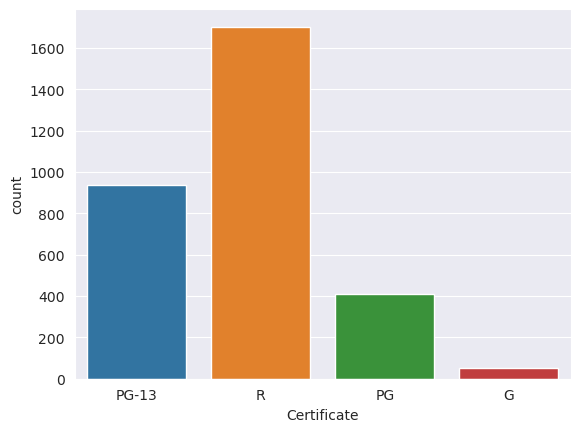

In [429]:
sns.countplot(x = df["Certificate"])

Sau khi gom nhóm các nhãn phim, cột `Certificate` còn lại 4 giá trị. Tuy số lượng giá trị `"G"` khá thấp nhưng nhóm vẫn quyết định giữ lại các dòng này

## 2.6. Mã hóa các giá trị của các cột đánh giá  `"Nudity"`, `"Violence"`, `"Profanity"`, `"Alcohol"`, `"Frightening"`

Như đã xử lí ở trên, các cột đánh giá sẽ có 4 mức độ:
- `None`: Hầu như không có
- `Mild`: Nhẹ
- `Moderate`: Vừa phải
- `Severe`: Nặng

Nhóm sẽ chuyển các cột này thành kiểu int với cách mã hóa như sau: 
- `None`: 1
- `Mild`: 2
- `Moderate`: 3
- `Severe`: 4

In [430]:
encode = {
    "None": 1,
    "Mild": 2,
    "Moderate": 3,
    "Severe": 4
}

df["Nudity"] = df["Nudity"].map(encode)
df["Violence"] = df["Violence"].map(encode)
df["Profanity"] = df["Profanity"].map(encode)
df["Alcohol"] = df["Alcohol"].map(encode)
df["Frightening"] = df["Frightening"].map(encode)

In [431]:
df

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Chugyeokja,2008,7.8,62423,"Action, Crime, Thriller",125,R,2,4,3,2,4
5023,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,R,4,4,4,2,4
5025,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,R,4,3,4,4,4
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,PG-13,1,1,2,3,1


Sau khi tiền xử lí, dữ liệu coàn 3105 dòng và 12 cột. Nhóm sẽ sử dụng dữ liệu này để phân tích và trực quan hóa

In [432]:
df.to_csv("../data/imdb_clean.csv", index = False)